In [1]:
!pip install fuzzy-c-means

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anacondalastone\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [4]:
import pandas as pd

# Load the Mall customer data
url = 'https://raw.githubusercontent.com/ITE-5th/fuzzy-clustering/master/data/crime_data.csv'

data = pd.read_csv(url)
data.head()

,,crime$cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,4,13.2,236,58,21.2
1,Alaska,4,10.0,263,48,44.5
2,Arizona,4,8.1,294,80,31.0
3,Arkansas,3,8.8,190,50,19.5
4,California,4,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   50 non-null     object 
 1   crime$cluster   50 non-null     int64  
 2   Murder          50 non-null     float64
 3   Assault         50 non-null     int64  
 4   UrbanPop        50 non-null     int64  
 5   Rape            50 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


In [6]:
data.describe()

,crime$cluster,Murder,Assault,UrbanPop,Rape
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2.720000,7.78800,170.760000,65.540000,21.232000
std,1.125584,4.35551,83.337661,14.474763,9.366385
min,1.000000,0.80000,45.000000,32.000000,7.300000
25%,2.000000,4.07500,109.000000,54.500000,15.075000
50%,3.000000,7.25000,159.000000,66.000000,20.100000
75%,4.000000,11.25000,249.000000,77.750000,26.175000
max,4.000000,17.40000,337.000000,91.000000,46.000000


<Figure size 36000x36000 with 0 Axes>

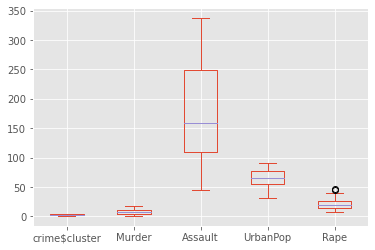

<Figure size 36000x36000 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
# set the plotting style to 'ggplot'
plt.style.use('ggplot')
data.plot.box()
plt.figure(figsize=(500,500))

In [8]:
cols = ['Murder', 'Assault','Rape']
features = data[cols]
features.head()

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

C:\Users\Admin\anacondalastone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

# Implement FCM

Text(0, 0.5, 'Assault')

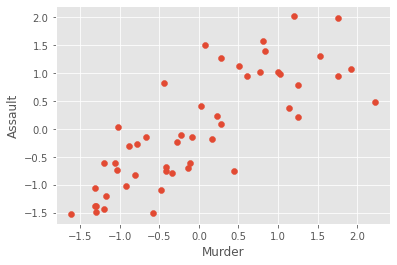

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Murder')
plt.ylabel('Assault')

From the scatter plot, we can roughly judge that there are 2 big clusters, which can be further divided into 3, 4 and even more clusters. We will divide the data into 3 clusters.

In [2]:
!pip install fuzzy-c-means

  Using cached fuzzy_c_means-1.7.0-py3-none-any.whl (9.0 kB)


In [11]:
from fcmeans import FCM

# Define the number of clusters
n_clusters = 3

# Initialize the FCM algorithm
fcm = FCM(n_clusters=n_clusters)

# Fit the data to the FCM algorithm
fcm.fit(X)

# Get the cluster centers and the membership matrix
centroids = fcm.centers
membership_mat = fcm.u

# Finally, we can assign each data point to the cluster with the highest membership:

In [12]:
import numpy as np

# Assign each data point to the cluster with the highest membership
labels = np.argmax(membership_mat, axis=1)
labels

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

or use `predict()` directly

In [13]:
labels_2 = fcm.predict(X)
labels_2

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

We get the same result:

# Clustering validation

Clustering validation is an important step in any clustering analysis as it helps to evaluate the quality of the clustering results. One way to validate the clustering results is by using the Partition Coefficient (PC) and Partition Entropy Coefficient (PEC) measures.

The Partition Coefficient (PC) measures the degree of homogeneity within each cluster. It is defined as the ratio of the sum of the squares of the number of data points in each cluster to the square of the total number of data points. The formula for PC is:

PC = (1/N) * sum(c=1 to C) (n_c)² / N²

where N is the total number of data points, C is the number of clusters, and n_c is the number of data points in cluster c.

The Partition Entropy Coefficient (PEC) measures the degree of heterogeneity among the clusters. It is defined as the negative sum of the product of the proportion of data points in each cluster and the logarithm of the proportion of data points in each cluster. The formula for PEC is:

PEC = -1 * sum(c=1 to C) (n_c / N) * log2(n_c / N)

where N is the total number of data points, C is the number of clusters, and n_c is the number of data points in cluster c.

Both PC and PEC range from 0 to 1, with higher values indicating better clustering results. A PC value closer to 1 indicates that the data points are well-distributed among the clusters, while a PEC value closer to 0 indicates that the clusters are highly homogeneous.

We can visualize how the values of PC and PEC change with different numbers of clusters to validate clustering results. First, let’s create models with 2, 3, 4, 5, 6 and 7 centers.

In [14]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)

Then, we can easily calculate the values of PC and PEC using the partition_coefficientthe and partition_entropy_coefficientmetrics of fuzzy-c-means package.

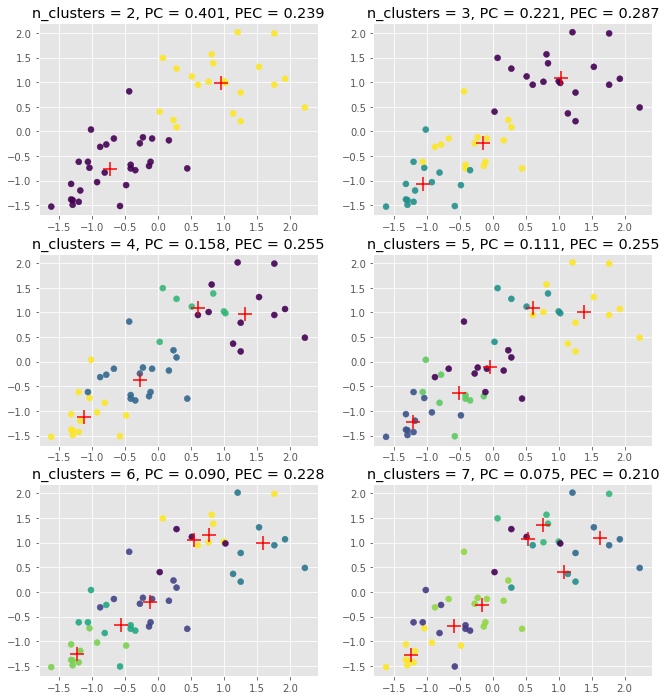

In [15]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,12))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.9)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=200, c='r')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

It displays that the model with 2 clusters obtains the highest partition coefficient (PC) value and the lowerst partition entropy coefficient (PEC) value for this example, and the models with 3 and 4 clusters also obtain comparatively higher PC value and lower PEC.

In [16]:
#3 clusters and 3 features. 
centroids

array([[ 1.09612137,  0.8001213 ,  0.20805745],
       [-0.80863002, -0.84490685, -0.71392929],
       [ 0.57393632,  1.02269881,  1.56205043]])

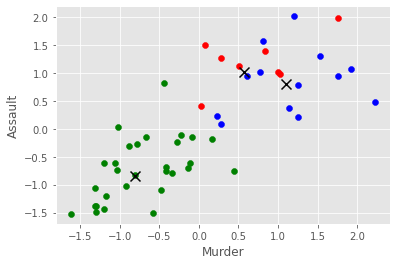

In [17]:
# Define the colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

n_clusters=3

# Plot the data points
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='#050505')

# Set the axis labels
plt.xlabel('Murder')
plt.ylabel('Assault')

# Show the plot
plt.show()

In [18]:
results = features.copy()
results['Labels'] = labels
results.head()

,Murder,Assault,Rape,Labels
0,13.2,236,21.2,0
1,10.0,263,44.5,2
2,8.1,294,31.0,2
3,8.8,190,19.5,0
4,9.0,276,40.6,2


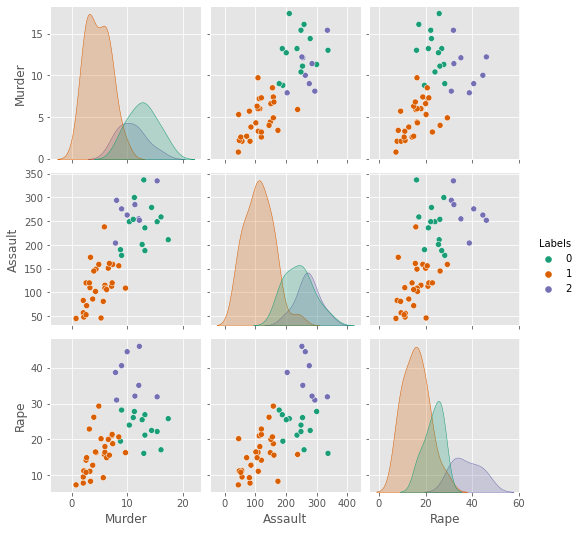

In [19]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Labels', palette='Dark2')

# Change to 2 clusters.

In [20]:
# Define the number of clusters
n_clusters = 2

# Initialize the FCM algorithm
fcm = FCM(n_clusters=n_clusters)

# Fit the data to the FCM algorithm
fcm.fit(X)

# Get the cluster centers and the membership matrix
centroids = fcm.centers
membership_mat = fcm.u

In [21]:
# Assign each data point to the cluster with the highest membership
labels = np.argmax(membership_mat, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
#2 clusters, 3 features. 
centroids

array([[ 0.95111928,  0.97760098,  0.77719724],
       [-0.72203519, -0.75415896, -0.62247402]])

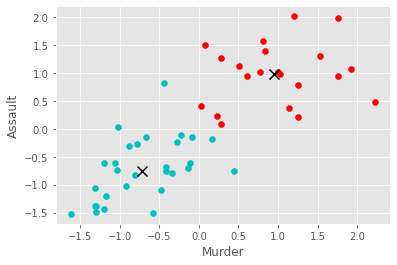

In [24]:
# Define the colors for each cluster
colors = ['r', 'c', 'm']

n_clusters=2

# Plot the data points
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='#050505')

# Set the axis labels
plt.xlabel('Murder')
plt.ylabel('Assault')

# Show the plot
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
import warnings

In [28]:
data=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [30]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [31]:
print('Is there any missing values',data.isnull().sum().any())

Is there any missing values False


In [32]:
print('Data shape is',data.shape)

Data shape is (178, 13)


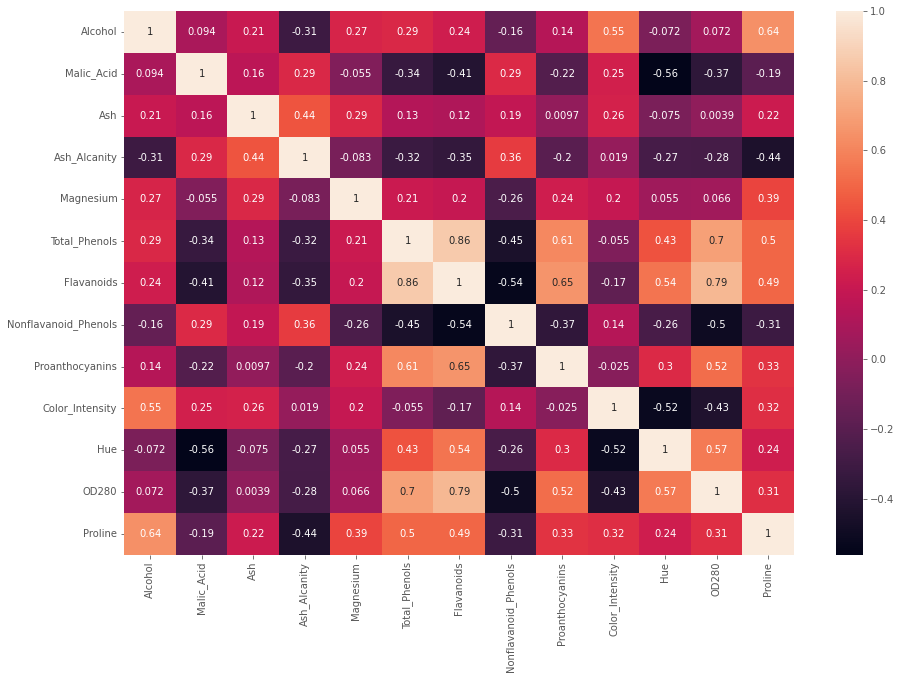

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

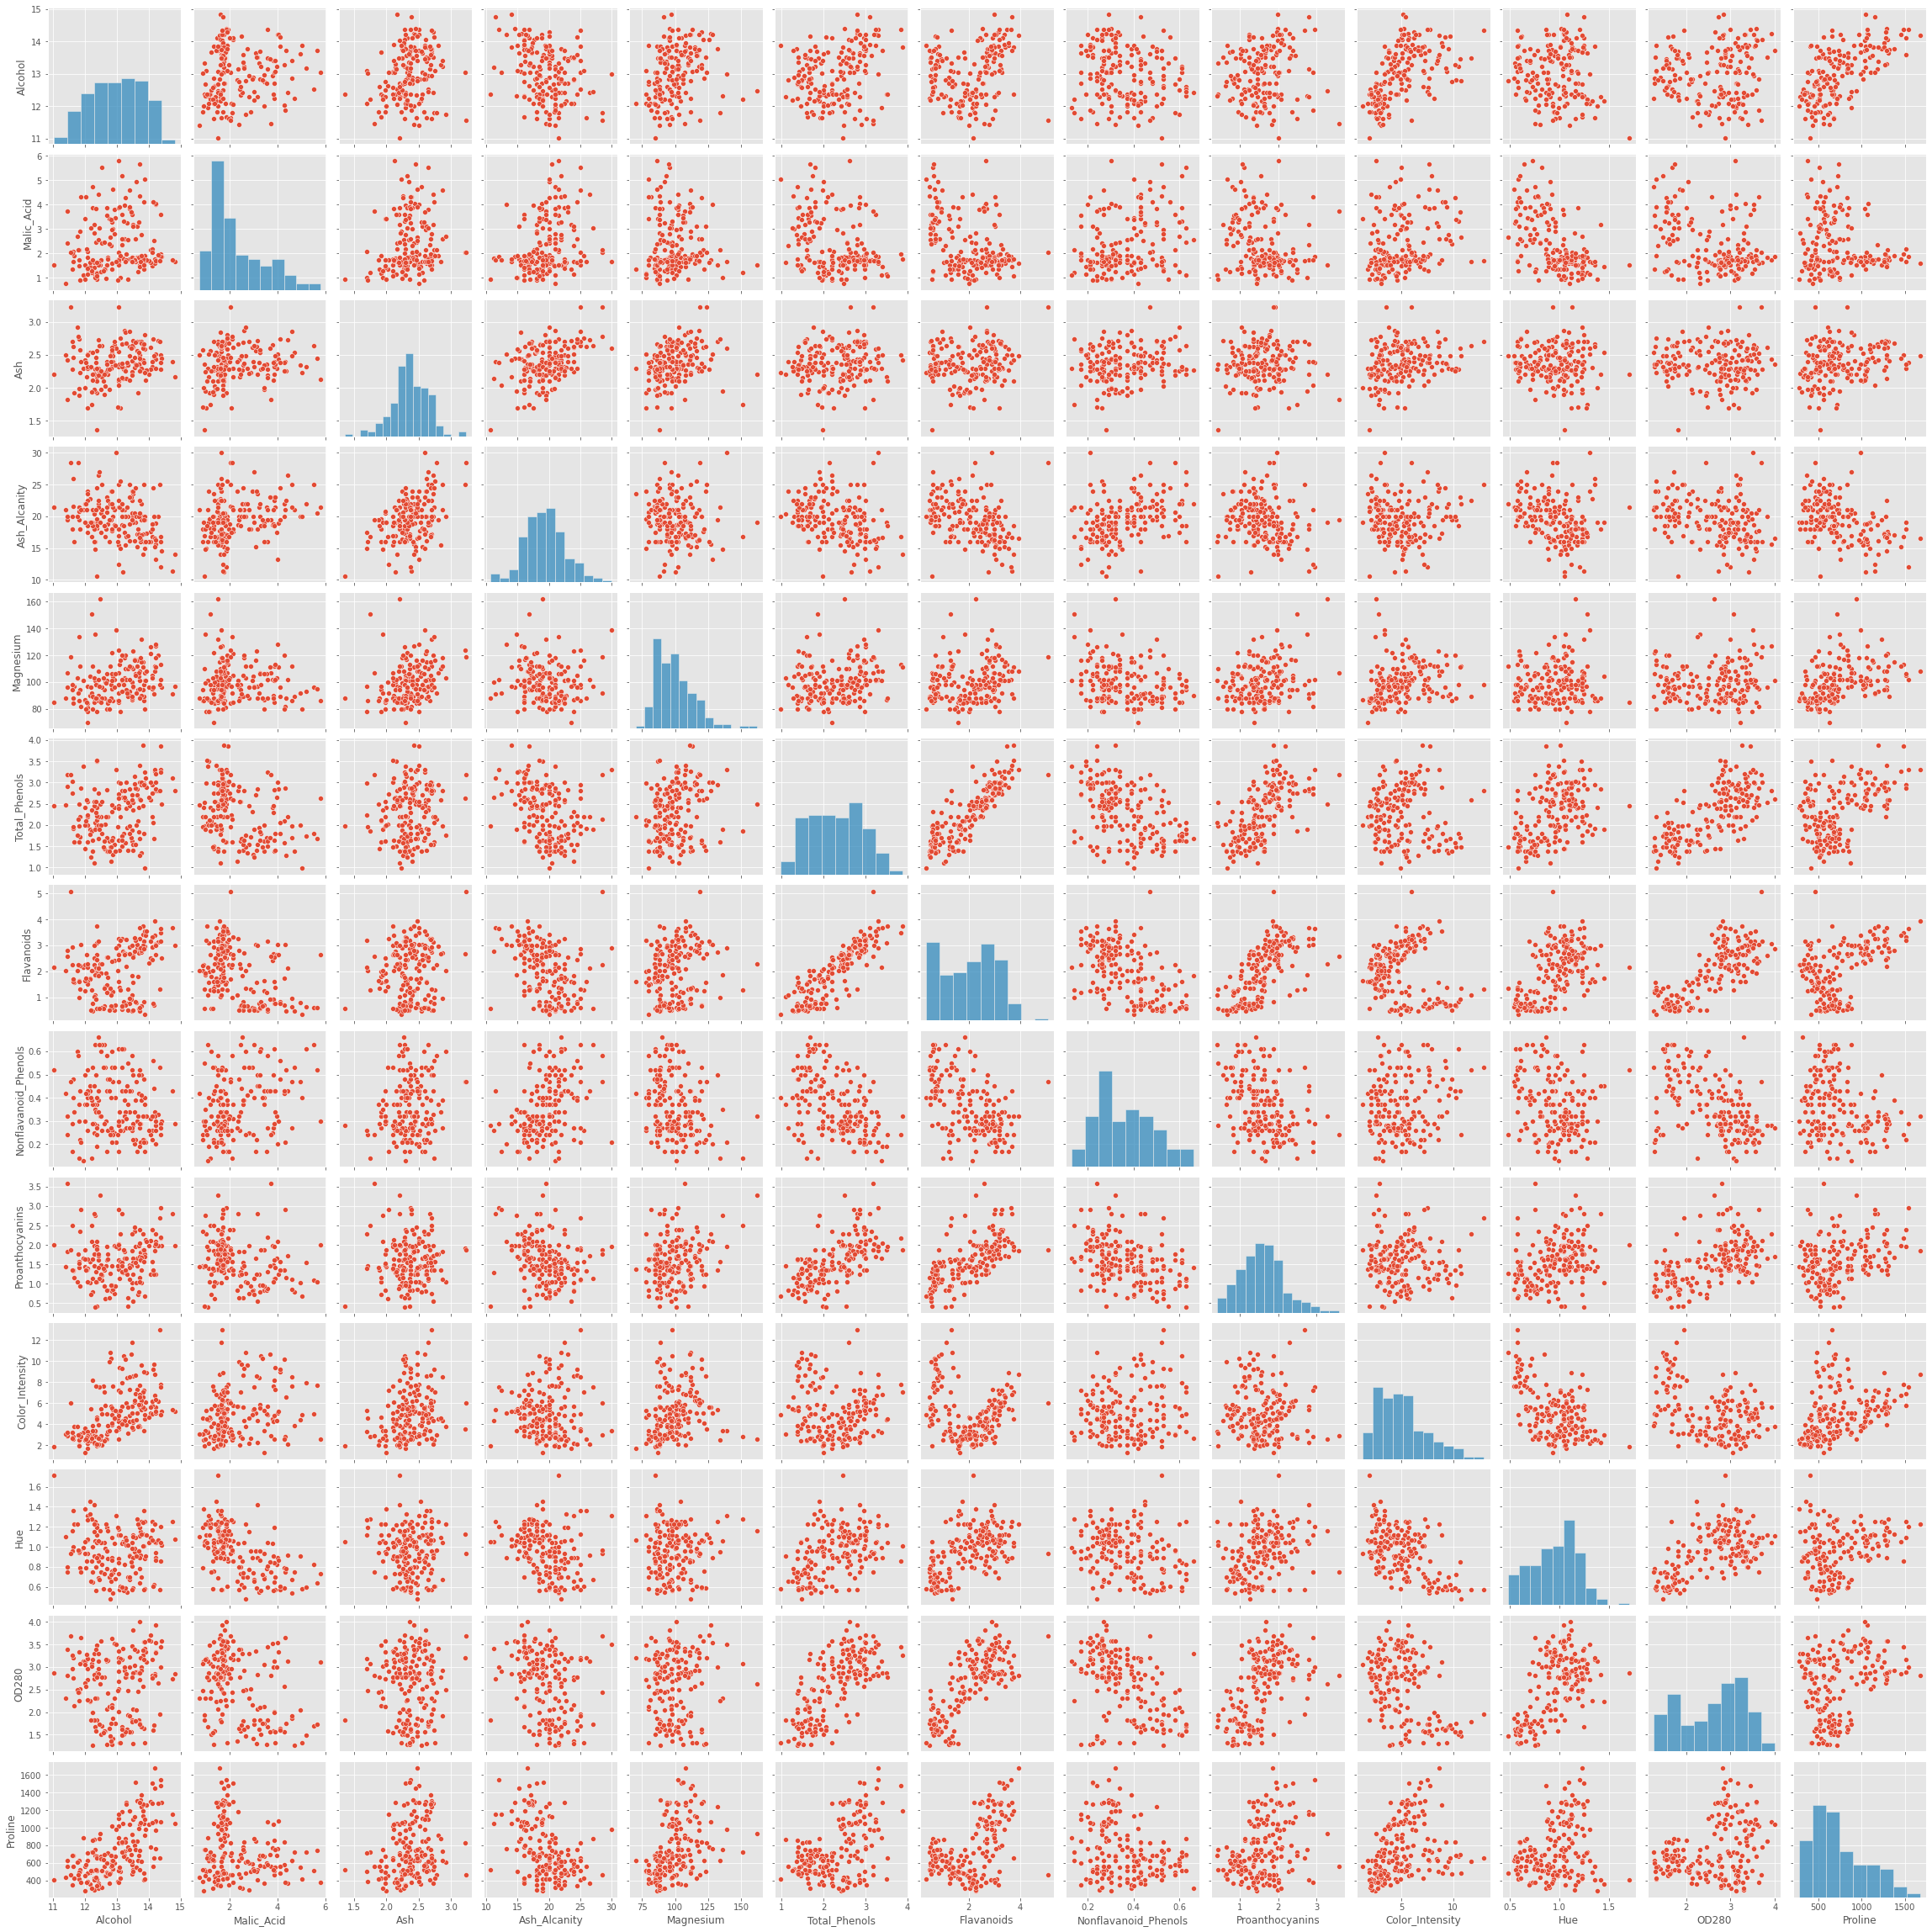

In [34]:
ax = sns.pairplot(data[data.columns])

Converting to numpy array

In [35]:
data=data.values

Scaling

In [36]:
st=StandardScaler()
data=st.fit_transform(data)

# Model

In [37]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(data)
    models.append(fcm)

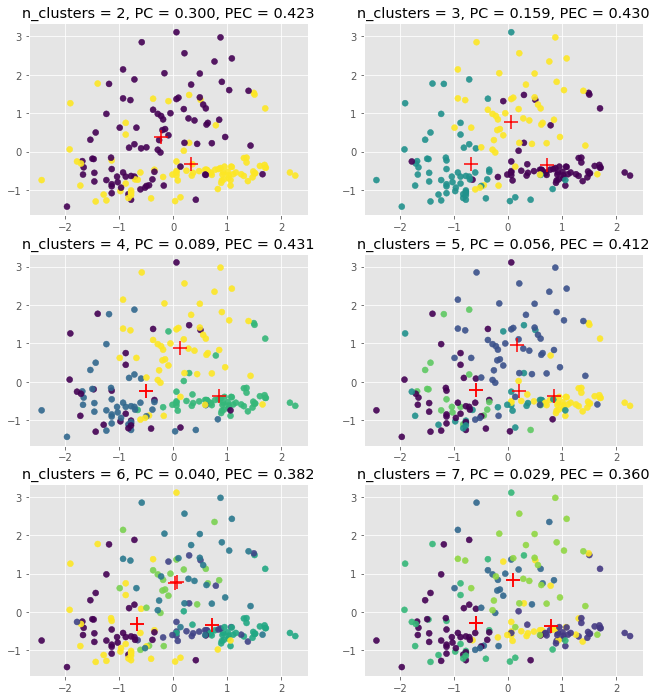

In [40]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,12))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(data)
    # plot result
    axe.scatter(data[:,0], data[:,1], c=fcm_labels, alpha=.9)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=200, c='r')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

It displays that the model with 2 clusters obtains the highest partition coefficient (PC) value and the lowest partition entropy coefficient (PEC) value for this example,
combination. 

In [41]:
# Define the number of clusters
n_clusters = 2

# Initialize the FCM algorithm
fcm = FCM(n_clusters=n_clusters)

# Fit the data to the FCM algorithm
fcm.fit(data)

# Get the cluster centers and the membership matrix
centroids = fcm.centers
membership_mat = fcm.u

In [42]:
# Assign each data point to the cluster with the highest membership
labels = np.argmax(membership_mat, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [43]:
data.shape, labels.shape

((178, 13), (178,))

In [44]:
#2 clusters, 13 features. 
centroids

array([[ 0.32818527, -0.31588706,  0.05673167, -0.38976746,  0.2054008 ,
         0.58125356,  0.62252879, -0.45002234,  0.41946707, -0.04325572,
         0.38985681,  0.5470688 ,  0.51880446],
       [-0.21979886,  0.38185628, -0.01304585,  0.3673044 , -0.20110373,
        -0.63285704, -0.68033377,  0.49643979, -0.48041174,  0.14691996,
        -0.47563236, -0.61306289, -0.43641385]])

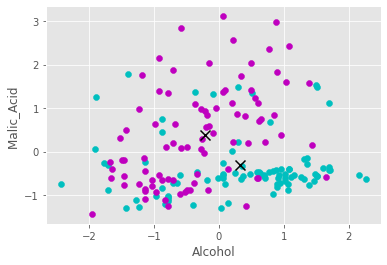

In [48]:
# Define the colors for each cluster
colors = ['c', 'm']

n_clusters=2

# Plot the data points
for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], c=colors[i])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='#050505')

# Set the axis labels
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid ')

# Show the plot
plt.show()

# Alcohol and Malic_Acid are not the best choice of features to see the best split into 2 clusters. 

Looks better changing the features in this 2d chart. 

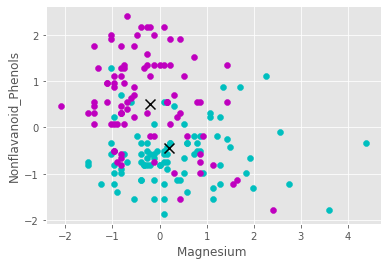

In [54]:
# Plot the data points
for i in range(n_clusters):
    plt.scatter(data[labels == i, 4], data[labels == i, 7], c=colors[i])

# Plot the centroids
plt.scatter(centroids[:, 4], centroids[:, 7], marker='x', s=100, c='#050505')

# Set the axis labels
plt.xlabel('Magnesium ')
plt.ylabel('Nonflavanoid_Phenols')

# Show the plot
plt.show()

Even better with the below features: 

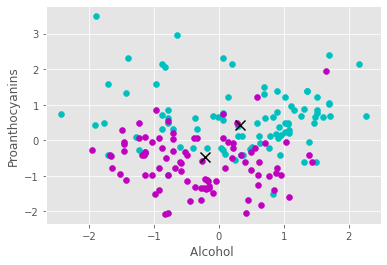

In [55]:
# Plot the data points
for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 8], c=colors[i])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 8], marker='x', s=100, c='#050505')

# Set the axis labels
plt.xlabel('Alcohol ')
plt.ylabel('Proanthocyanins')

# Show the plot
plt.show()

# Fuzzy C-Means clustering is a powerful unsupervised machine learning technique that can be used to group data points with similar characteristics. It is particularly useful when the boundaries between clusters are not well-defined, or when a data point could belong to multiple clusters with different degrees of membership.